# Indirect functions

In order to plot an <a href="https://en.wikipedia.org/wiki/Implicit_function">implicite function</a> in R, e.g. the function of a circle, recall the general structure of implicite functions.
\begin{align*}
F(x,y) &=0
\end{align*}

In general, we can define such a function also as an explicite three-dimensional function, i.e. as a triple $(x,y,z)$ where $F: (x,y) \to z$.
\begin{align*}
z &= F(x,y)
\end{align*}
This is, we simply add another dimension $z$.

Suppose now, we want to describe a circle on the $(x,y)$-plane. This can be done with the implicite function
\begin{align*}
0 = (x - x_{0})^{2}+ (y - y_{0})^{2} -r
\end{align*}


This implicite funtion is the contour line for $z=0$ of a paraboloid in a threedimensional space
\begin{align*}
z = F(x,y) = (x - x_{0})^{2}+ (y - y_{0})^{2} -r = 0
\end{align*}

So, in order to plot a circle (or any other implicite function) in R, we can use this generalization. We add the auxillary third dimenstion and use a contour plot (i.e. only one contour line from the 3D structure). 

In order to construct a three-dimensional plot, you need generate a mesh of all ordered pairs $(x,y)$. You can do that with the function $\texttt{outer()}$. For each of these ordered pairs we associate a function value.

In the following, we examine the implicite function for a circle
\begin{align*}
x^{2}+ y^{2} -1 = 0
\end{align*}

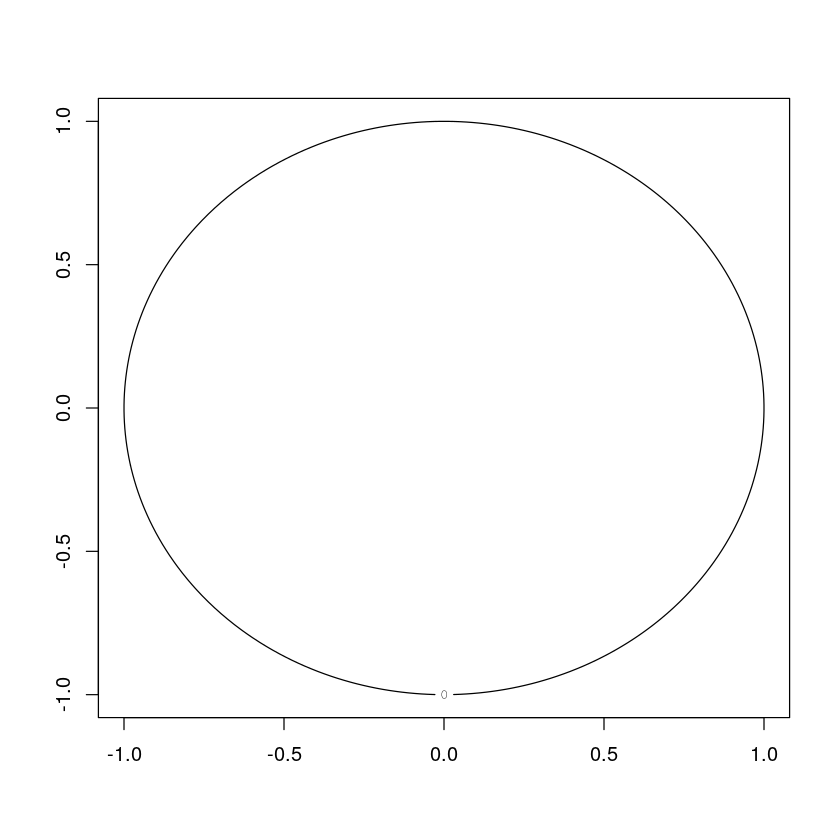

In [1]:
x<-seq(-1,1,length=100)
y<-seq(-1,1,length=100)
z<-outer(x,y,function(x,y) x^2 + y^2 -1)
contour(x,y,z,levels=0)

In order to plot the entire paraboloid, we can use the $\texttt{wireframe}$ function from the $\texttt{lattice}$ package.

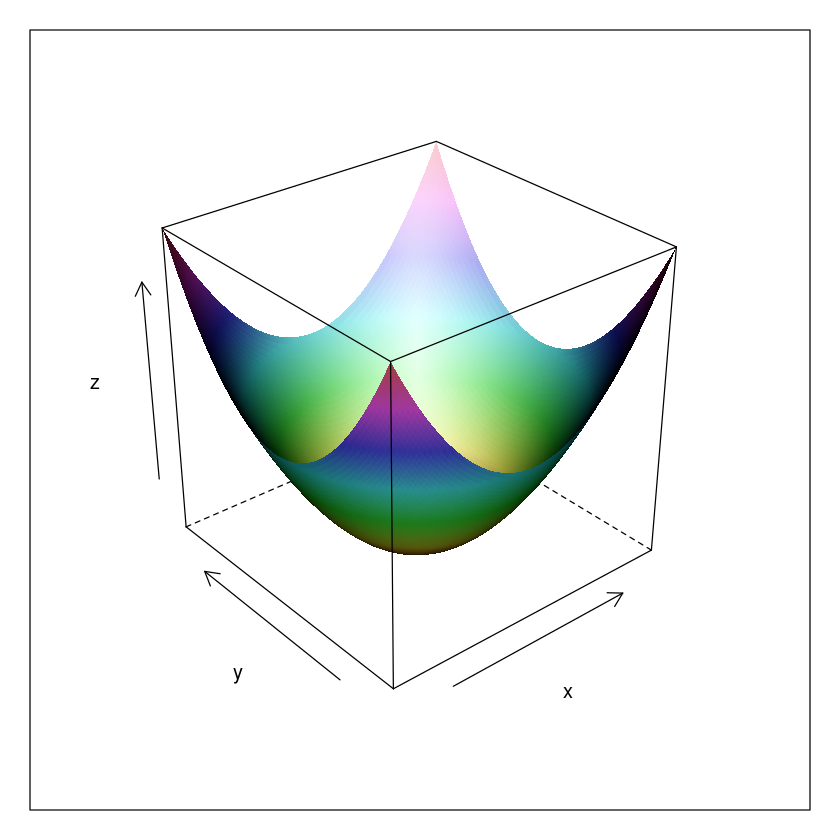

In [9]:
library("lattice")
wireframe(z,shade=T,col.regions=rainbow(100),pretty=T,xlab="x",ylab="y")

### Addendum: special case: Plotting a circle without contour plots

For completness, plotting a circle can also be done without a contourplot. For this purpose the Cartesian coordinates $(x,y)$ have to be transformed to the polar coordinates $(r,\phi)$. $r$ denotes the length of the vector described by the Cartesian coordinates  and $\phi$ is the angle of this vector (measured against the positive part of the horizontal axis in the Cartesian coordinate system). The following relations can also be found <a href="https://vitruv.uni-tuebingen.de/ilias3/goto_pr01_pg_9489_4881.html">in the video on complex numbers.</a>.

\begin{align*}
    r &= \sqrt{x^{2} + y^{2}}\\
    \phi &= tan^{-1}(\frac{y}{x})\\
    x &= r \, \cos(\phi)\\
    y &= r  \, \sin(\phi)
\end{align*}

We can write to R functions to convert the coordinates:

In [16]:
cart2pol <- function(x, y){
    # compute r
    r = np.sqrt(x^2 + y^2)
    # compute phi
    phi = atan2(y, x)
    return(list(r=r, phi=phi))
}


pol2cart <- function(r, phi){
        # compute x
    x = r * cos(phi)
    # compute y
    y = r * sin(phi)
    return(list(x=x, y=y))
}

In polar coordinates, the unit circle can be described by setting $r=1$. Thus, we can for each $\phi$ set the length $r=1$. All ordered pairs $(\phi,1)$ can then be converted to cartesian coordinates and then be plotted.

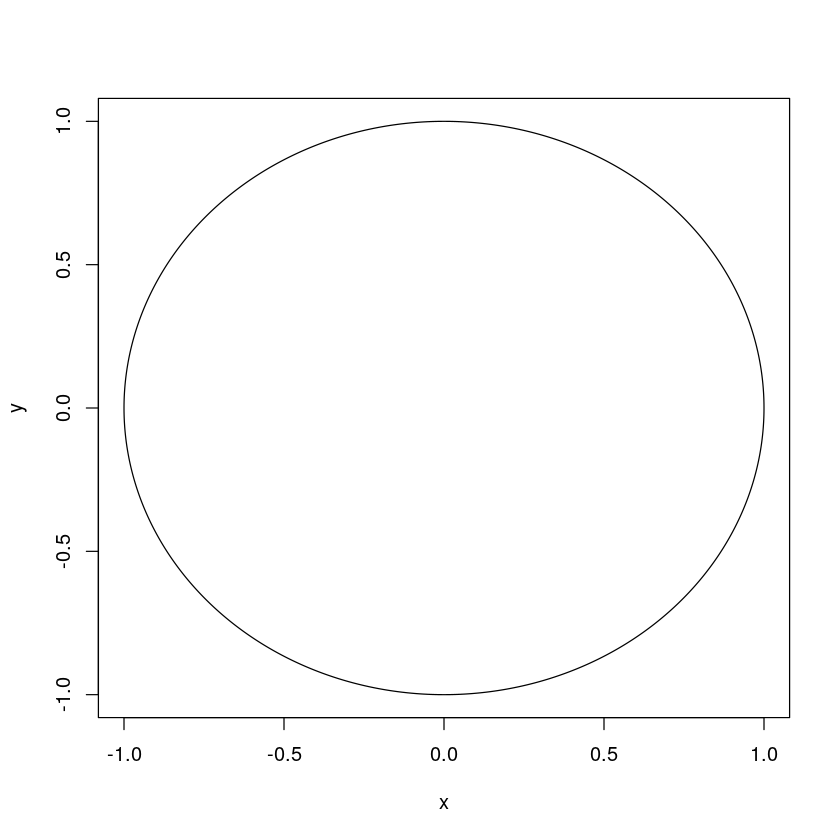

In [27]:
# Der Winkel \phi muss variabel gehalten werden
phi = seq(0,2*pi,2*pi/1000)
r = 1
# Umwandeln aller geordneten Paare in kartesische Koordinaten
res = pol2cart(r, phi)

plot(res$x, res$y,type="l",xlab="x",ylab="y") 

## Task 1

In economics and for busines, the <a href="https://de.wikipedia.org/wiki/Cobb-Douglas-Funktion">Copp-Douglas production function</a> is often used to describe production output depending on several input factors. Often, the quantity $Y$ is described as a function of the input factor labour $L$ and the input factor capital $K$. Moreover, the technology parameter $A$ and the factor elasticity $\alpha$ (here the factor elasticity of capital) are fixed to some parameter values.

\begin{align*}
Y = A\;K^\alpha L^{1-\alpha}
\end{align*}

Suppopse, $\alpha = 0.2$ and $A = 1$. 

1. Plot the production function in three dimensions.

2. Make another graph that plots the so called isoquants i.e. the contour lines of this productionfunction for the output quantities $Y=100,200,300$.

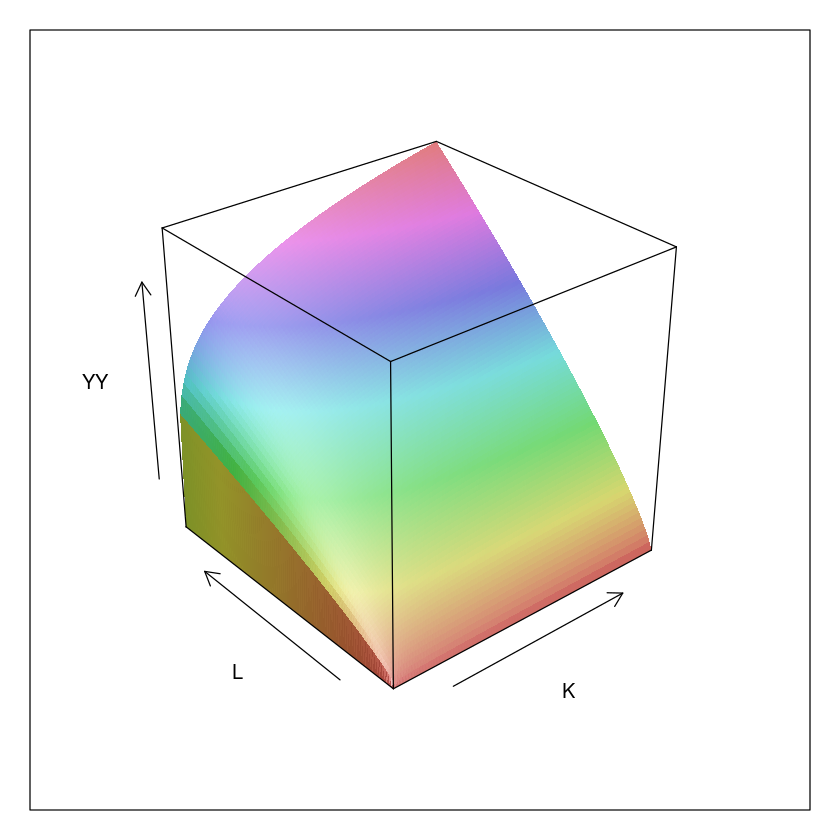

In [47]:
aa = 0.2
AA =1
kk =  seq(0, 1000,10)
ll =  seq(0, 1000,10)

CoppDoug <- Vectorize(function(K,L,alpha,A){
    return(A*(K^alpha)*(L^(1-alpha)))
},vectorize.args=c("K","L"))
    

YY =  outer(kk,ll,CoppDoug,alpha=aa,A=AA)
wireframe(YY,shade=T,col.regions=rainbow(100),pretty=T,xlab="K",ylab="L")

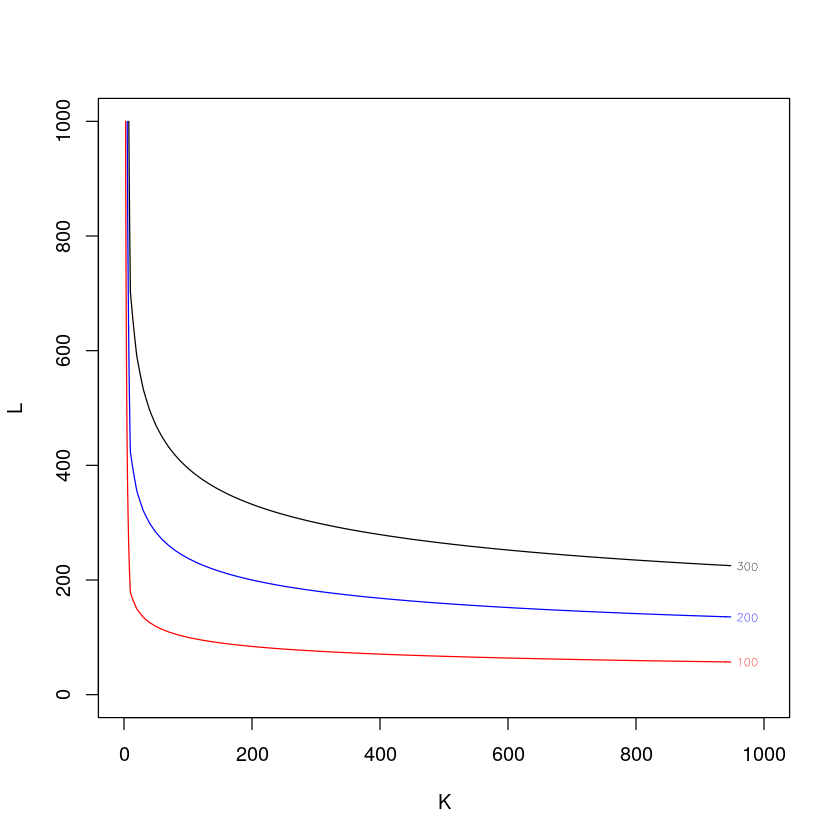

In [48]:
contour(kk,ll,YY,levels=c(100,200,300),col=c("red","blue","black"),xlab="K",ylab="L")

## Task 2

In the field of microeconomics, it is often useful to assume a <a href="https://de.wikipedia.org/wiki/Nutzenfunktion_(Mikro%C3%B6konomie)">utility function</a> for a representative consumer. Suppose the utility of such a representative consumer depends on two factors: the share of the available daily time for leisure activity, $1-l$ and the consumed goods $c$. Furthermore, we assume the preference structure of the representative consumer allows the following functional relation:
\begin{align*}
    U(1-l,c) = \theta\sqrt{c} + \phi \log(1-l)
\end{align*}
where $0\leq l < 1$, $0\leq c < 1000$, $\phi = 1.2$ and $\theta=0.2$.

1. Plot the utility function in a 3D graph.

2. Plot another graph with the so called indifference curves for the utility levels $U=0,2,4$, i.e. all combinations of $l$ and $c$ for which the consumer reaches the same utility level $U$. 

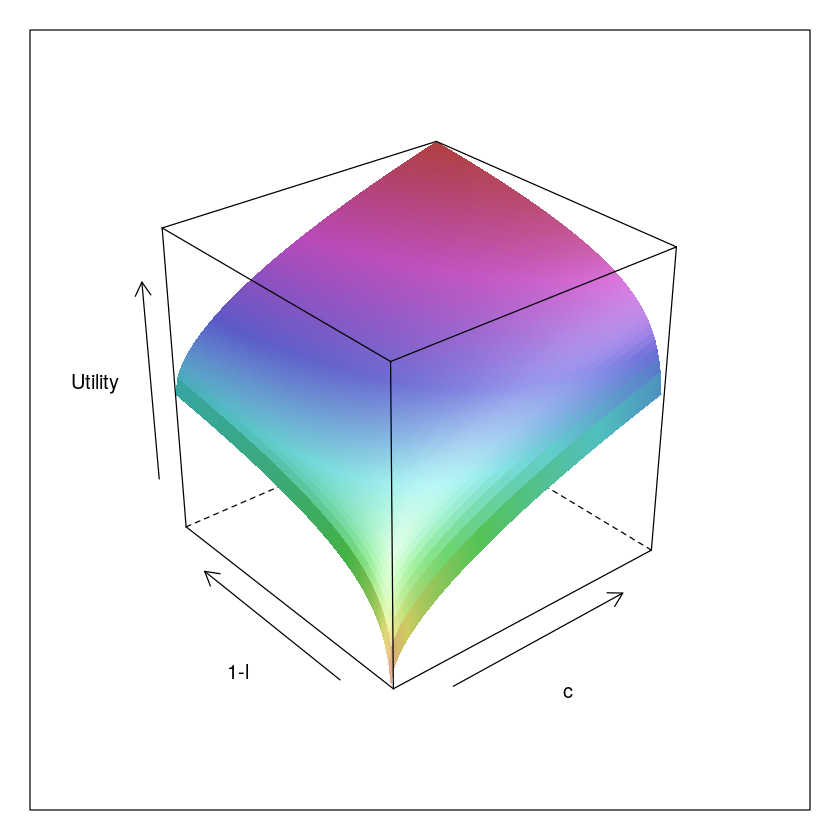

In [59]:

pp =1.2
tt = 0.2
hh = seq(0,1,1/100)
cc =  seq(0,1000,10)

Utility<- Vectorize(function(C,H,theta,phi){
    return(theta*sqrt(C)+phi*log(H))
}, vectorize.args=c("C","H"))
    

UU = outer(cc,hh,Utility,theta=tt,phi=pp)
wireframe(UU,shade=T,col.regions=rainbow(100),pretty=T,xlab="c",ylab="1-l",zlab="Utility")

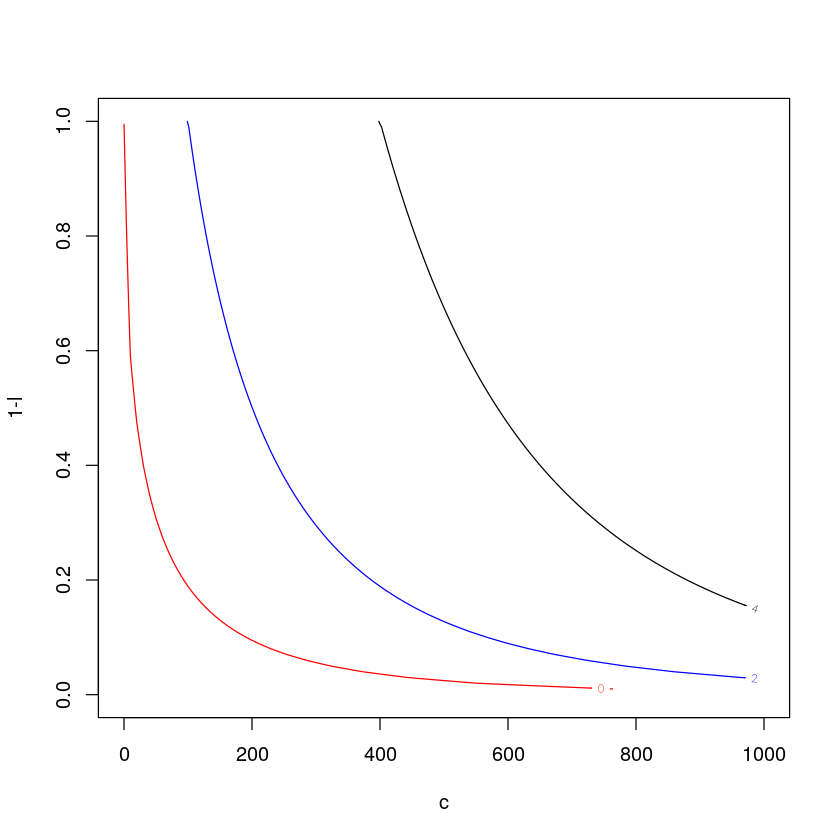

In [60]:
contour(cc,hh,UU,levels=c(0,2,4),
        col=c("red","blue","black"),
        xlab="c",
        ylab="1-l",
        xlim=c(0,1000),
        ylim=c(0,1)
       )